# q2

In [19]:
import numpy as np
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Number of features: {train_data.shape[1]}")

print("\nSample target values (median home prices in $1000s):")
print(train_targets[:10])

Training data shape: (404, 13)
Test data shape: (102, 13)
Number of features: 13

Sample target values (median home prices in $1000s):
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


# q3

In [20]:
variances = np.var(train_data, axis=0)
highest_variance_index = np.argmax(variances)
lowest_variance_index = np.argmin(variances)

feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

print(f"Feature with highest variance: {feature_names[highest_variance_index]}")
print(f"Feature with lowest variance: {feature_names[lowest_variance_index]}")


Feature with highest variance: TAX
Feature with lowest variance: NOX


# q4i

In [21]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data_norm = (train_data - mean) / std

X = np.hstack([np.ones((train_data_norm.shape[0], 1)), train_data_norm])
Y = train_targets.reshape(-1, 1)

XTX = X.T @ X
XTX_inv = np.linalg.inv(XTX)
XTY = X.T @ Y
W_opt = XTX_inv @ XTY

print("Optimal weights (including bias term):")
print(W_opt.flatten())


Optimal weights (including bias term):
[22.3950495  -1.10749194  1.35308963  0.02710126  0.9943535  -2.40156557
  2.3962877   0.2111952  -3.47121628  2.90814885 -1.95741889 -1.98298545
  0.81955092 -4.02739073]


# q4ii

In [22]:
predictions_opt = X @ W_opt
error_opt = Y - predictions_opt
optimum_loss = np.mean(error_opt**2)
print(f"Optimum loss value: {optimum_loss}")


Optimum loss value: 22.004800838348142


# q4iii

In [23]:
np.random.seed(0)
W_gd = np.random.randn(X.shape[1], 1)

learning_rate = 0.01
momentum = 0.9
epochs = 1000
N = X.shape[0]

velocity = np.zeros_like(W_gd)
losses = []

for epoch in range(epochs):
    predictions = X @ W_gd
    error = Y - predictions
    gradient = -(2/N) * X.T @ error
    velocity = momentum * velocity - learning_rate * gradient
    W_gd = W_gd + velocity
    loss = np.mean(error**2)
    losses.append(loss)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss:.4f}")

print("\nOptimal weights from Gradient Descent:")
print(W_gd.flatten())
print(f"Final loss: {losses[-1]:.4f}")


Epoch 100: Loss = 22.0600
Epoch 200: Loss = 22.0078
Epoch 300: Loss = 22.0050
Epoch 400: Loss = 22.0048
Epoch 500: Loss = 22.0048
Epoch 600: Loss = 22.0048
Epoch 700: Loss = 22.0048
Epoch 800: Loss = 22.0048
Epoch 900: Loss = 22.0048
Epoch 1000: Loss = 22.0048

Optimal weights from Gradient Descent:
[22.3950495  -1.10749177  1.35308925  0.02710031  0.99435366 -2.40156555
  2.39628791  0.21119492 -3.47121651  2.90814571 -1.95741539 -1.98298536
  0.81955087 -4.02739059]
Final loss: 22.0048


# q5i

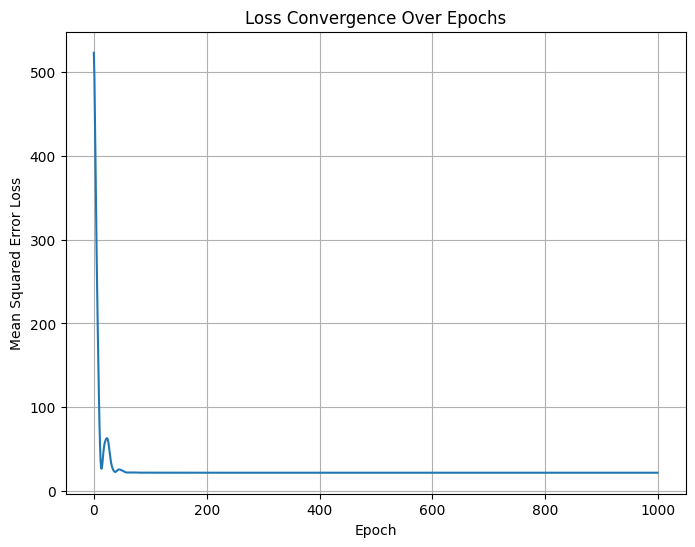

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses)
plt.title("Loss Convergence Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error Loss")
plt.grid(True)
plt.show()

# q5ii

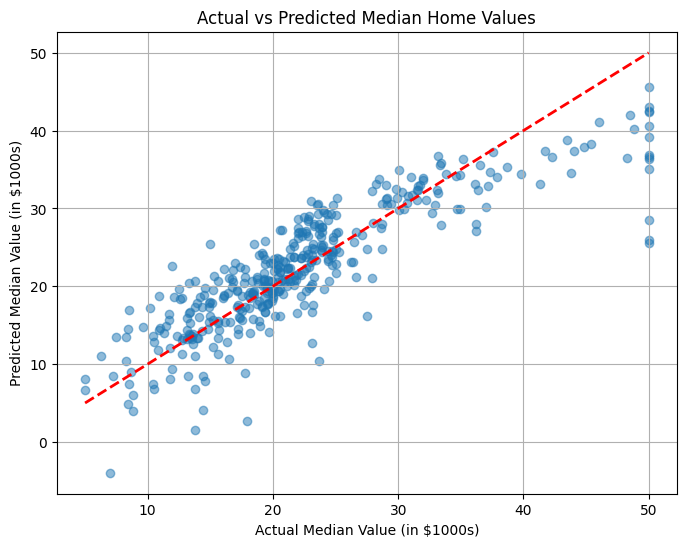

In [25]:
import matplotlib.pyplot as plt

predictions_gd = X @ W_gd

plt.figure(figsize=(8, 6))
plt.scatter(Y, predictions_gd, alpha=0.5)
plt.title("Actual vs Predicted Median Home Values")
plt.xlabel("Actual Median Value (in $1000s)")
plt.ylabel("Predicted Median Value (in $1000s)")
plt.grid(True)

plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)

plt.show()

# Separate

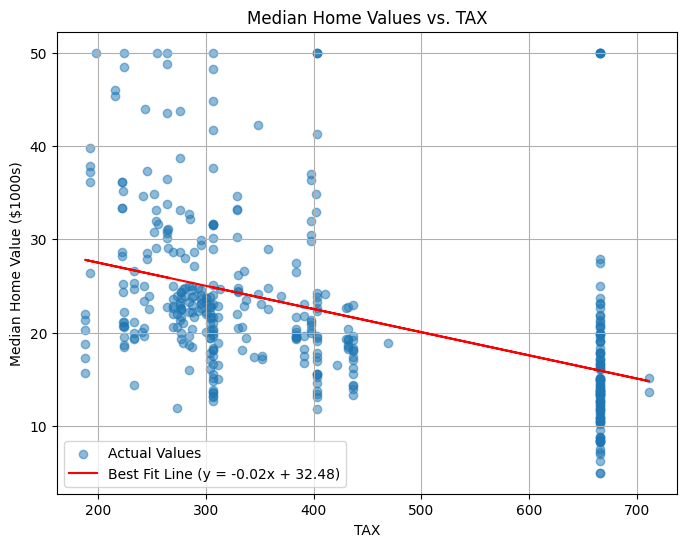


Slope of the best-fit line: -0.0248
Intercept of the best-fit line: 32.4783


In [26]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Use the correct variable name
highest_variance_feature_index = highest_variance_index
highest_variance_feature_name = feature_names[highest_variance_feature_index]

# Extract the data for the highest variance feature (TAX) and the target values
highest_variance_feature_data = train_data[:, highest_variance_feature_index]
target_data = train_targets

# Perform simple linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(highest_variance_feature_data, target_data)

# Generate predicted values using the calculated slope and intercept
predicted_values = slope * highest_variance_feature_data + intercept

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(highest_variance_feature_data, target_data, alpha=0.5, label='Actual Values')
plt.plot(highest_variance_feature_data, predicted_values, color='red',
         label=f'Best Fit Line (y = {slope:.2f}x + {intercept:.2f})')

plt.title(f"Median Home Values vs. {highest_variance_feature_name}")
plt.xlabel(highest_variance_feature_name)
plt.ylabel("Median Home Value ($1000s)")
plt.legend()
plt.grid(True)
plt.show()

print(f"\nSlope of the best-fit line: {slope:.4f}")
print(f"Intercept of the best-fit line: {intercept:.4f}")
